# Módulo Extra

## Aula 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import seaborn as sns
import warnings
sns.set_style('darkgrid')
plt.rcParams.update({'font.size': 15})
warnings.filterwarnings('ignore')

In [3]:
df_cadastros = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/Avaliacao_Credito/main/dados/clientes_cadastrados.csv')
df_cadastros.head()

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
0,5008804,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
1,5008805,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
2,5008806,H,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Seguranca,2.0,3.1
3,5008808,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
4,5008809,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4


In [4]:
df_cadastros['ID_Cliente'].value_counts()

7045794    2
7636389    2
7046068    2
7052812    2
7742298    2
          ..
5709384    1
5727815    1
5729862    1
6780485    1
6293503    1
Name: ID_Cliente, Length: 438510, dtype: int64

In [5]:
df_cadastros[df_cadastros['ID_Cliente'].duplicated(keep=False)].head()

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
421211,7702516,M,0,1,2,180000.0,Empregado,Ensino medio,Casado,Casa propria,32.0,1,1,1,0,Venda,4.0,3.4
421268,7602432,H,0,1,0,315000.0,Associado comercial,Ensino superior,Uniao estavel,Casa propria,46.0,1,0,1,0,Motorista,2.0,3.6
421349,7602432,M,0,0,0,117000.0,Pensionista,Ensino superior,Casado,Casa propria,68.0,1,0,0,0,Outros,2.0,-1000.7
421464,7836971,H,1,0,1,157500.0,Empregado,Ensino medio,Casado,Casa propria,38.0,1,0,0,0,Outros,3.0,15.1
421698,7213374,H,1,0,0,148500.0,Empregado,Ensino medio,Casado,Casa propria,27.0,1,0,1,0,Construcao Civil,2.0,2.6


In [6]:
id_repetidos = df_cadastros[df_cadastros['ID_Cliente'].duplicated(keep=False)]['ID_Cliente']
id_repetidos.head()

421211    7702516
421268    7602432
421349    7602432
421464    7836971
421698    7213374
Name: ID_Cliente, dtype: int64

In [7]:
df_cadastros_ID_unicos = df_cadastros.drop(id_repetidos.index)
df_cadastros_ID_unicos.head()

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
0,5008804,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
1,5008805,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
2,5008806,H,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Seguranca,2.0,3.1
3,5008808,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
4,5008809,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4


In [8]:
df_cadastros_ID_unicos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438463 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438463 non-null  int64  
 1   Genero                 438463 non-null  object 
 2   Tem_Carro              438463 non-null  int64  
 3   Tem_Casa_Propria       438463 non-null  int64  
 4   Qtd_Filhos             438463 non-null  int64  
 5   Rendimento_Anual       438463 non-null  float64
 6   Categoria_de_renda     438463 non-null  object 
 7   Grau_Escolaridade      438463 non-null  object 
 8   Estado_Civil           438463 non-null  object 
 9   Moradia                438463 non-null  object 
 10  Idade                  438463 non-null  float64
 11  Tem_Celular            438463 non-null  int64  
 12  Tem_telefone_trabalho  438463 non-null  int64  
 13  Tem_telefone_fixo      438463 non-null  int64  
 14  Tem_email              438463 non-nu

### Desafio 1: Explorar IDs repetidos (Atualização de cadastro? Erro?).

In [9]:
df_cadastros.iloc[id_repetidos.index].sort_values('ID_Cliente')

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
426818,7022197,H,1,1,3,135000.0,Empregado,Ensino medio,Casado,Casa propria,33.0,1,0,0,1,Construcao Civil,5.0,2.0
425023,7022197,M,0,1,0,450000.0,Associado comercial,Ensino superior,Separado,Casa propria,54.0,1,0,0,1,Outros,1.0,4.9
431545,7022327,M,0,1,0,135000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,40.0,1,0,0,0,Alta tecnologia,1.0,14.5
431911,7022327,H,1,1,0,256500.0,Associado comercial,Ensino superior,Casado,Casa propria,59.0,1,0,0,1,Equipe principal,2.0,4.6
425486,7023108,H,1,1,1,67500.0,Empregado,Ensino medio,Casado,Casa propria,42.0,1,1,0,0,Equipe principal,3.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426563,7836711,M,0,1,2,292500.0,Empregado,Ensino superior,Casado,Casa propria,38.0,1,0,1,0,Contabilidade,4.0,12.0
421464,7836971,H,1,0,1,157500.0,Empregado,Ensino medio,Casado,Casa propria,38.0,1,0,0,0,Outros,3.0,15.1
428620,7836971,M,0,1,0,103500.0,Empregado,Ensino medio,Uniao estavel,Casa propria,37.0,1,0,1,0,Venda,2.0,7.7
422068,7838075,H,0,1,0,337500.0,Associado comercial,Ensino medio,Casado,Casa propria,50.0,1,0,0,1,Motorista,2.0,3.5


Observando os dados onde os ID são repetidos, parece que relmente foi um erro, onde a maior parte das features são diferentes. Como por exemplo o ID 7022197, onde uma das linhas se refere a um homem de 33 anos, e a segunda a uma mulher de 54 anos. Fato que torna difícil acreditar que foi alguma atualização, e sim algum erro do sistema. Por esta razão o melhor a se fazer nesse caso deve ser eliminar esses dados mesmo.

### Desafio 2: Explorar as colunas (features) identificar continuas, categóricas e binárias.

In [10]:
df_cadastros_ID_unicos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438463 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438463 non-null  int64  
 1   Genero                 438463 non-null  object 
 2   Tem_Carro              438463 non-null  int64  
 3   Tem_Casa_Propria       438463 non-null  int64  
 4   Qtd_Filhos             438463 non-null  int64  
 5   Rendimento_Anual       438463 non-null  float64
 6   Categoria_de_renda     438463 non-null  object 
 7   Grau_Escolaridade      438463 non-null  object 
 8   Estado_Civil           438463 non-null  object 
 9   Moradia                438463 non-null  object 
 10  Idade                  438463 non-null  float64
 11  Tem_Celular            438463 non-null  int64  
 12  Tem_telefone_trabalho  438463 non-null  int64  
 13  Tem_telefone_fixo      438463 non-null  int64  
 14  Tem_email              438463 non-nu

In [11]:
features_int = df_cadastros_ID_unicos.select_dtypes('int64').columns
features_int

Index(['ID_Cliente', 'Tem_Carro', 'Tem_Casa_Propria', 'Qtd_Filhos',
       'Tem_Celular', 'Tem_telefone_trabalho', 'Tem_telefone_fixo',
       'Tem_email'],
      dtype='object')

In [12]:
for feature in features_int:
    print(feature + ': Valores Únicos' + str(df_cadastros_ID_unicos[feature].unique())+ '\n')

ID_Cliente: Valores Únicos[5008804 5008805 5008806 ... 6841878 6842765 6842885]

Tem_Carro: Valores Únicos[1 0]

Tem_Casa_Propria: Valores Únicos[1 0]

Qtd_Filhos: Valores Únicos[ 0  1  3  2  4  5 14 19  7  9 12  6]

Tem_Celular: Valores Únicos[1]

Tem_telefone_trabalho: Valores Únicos[1 0]

Tem_telefone_fixo: Valores Únicos[0 1]

Tem_email: Valores Únicos[0 1]



Observando as variáveis classificadas como inteiro percebemos que a maioria é binária. Porém temos o ID_cliente onde cada um se refere a um cliente. A quantidade de filhos que está variando entre 0 e 19, e além disso, temos a variável tem celular, onde, para todos os clientes, o valor é igual a 1, ou seja, todos os clientes possuem celular, e essa variável aparenta ser desnecessária para o nosso problema.

In [13]:
features_cont = df_cadastros_ID_unicos.select_dtypes('float64').columns
features_cont

Index(['Rendimento_Anual', 'Idade', 'Tamanho_Familia', 'Anos_empregado'], dtype='object')

In [14]:
for feature in features_cont:
    print(feature + ': mínimo e máximo  ' + str(df_cadastros_ID_unicos[feature].min()) + ' - ' + str(df_cadastros_ID_unicos[feature].max())+ '\n')

Rendimento_Anual: mínimo e máximo  26100.0 - 6750000.0

Idade: mínimo e máximo  21.0 - 69.0

Tamanho_Familia: mínimo e máximo  1.0 - 20.0

Anos_empregado: mínimo e máximo  -1000.7 - 48.0



As variávies classificadas como números contínuos parecem ter sido classificadas corretamente, onde todas representam um valor numérico.

In [15]:
features_cat = df_cadastros_ID_unicos.select_dtypes('object').columns
features_cat

Index(['Genero', 'Categoria_de_renda', 'Grau_Escolaridade', 'Estado_Civil',
       'Moradia', 'Ocupacao'],
      dtype='object')

In [16]:
for feature in features_cat:
    print(feature + ': Valores únicos  ' + str(df_cadastros_ID_unicos[feature].unique()) + '\n')

Genero: Valores únicos  ['H' 'M']

Categoria_de_renda: Valores únicos  ['Empregado' 'Associado comercial' 'Pensionista' 'Servidor publico'
 'Estudante']

Grau_Escolaridade: Valores únicos  ['Ensino superior' 'Ensino medio' 'Ensino superior incompleto'
 'Ensino fundamental' 'Pos graduacao']

Estado_Civil: Valores únicos  ['Uniao estavel' 'Casado' 'Solteiro' 'Separado' 'Viuvo']

Moradia: Valores únicos  ['Alugado' 'Casa propria' 'Habitacao publica' 'Mora com os pais'
 'Cooperativa habitacional' 'Apartamento comercial']

Ocupacao: Valores únicos  ['Outros' 'Seguranca' 'Venda' 'Contabilidade' 'Construcao Civil'
 'Gerencia' 'Motorista' 'Equipe principal' 'Alta tecnologia' 'Limpeza'
 'Servico privado' 'Cozinha' 'Baixa qualificacao' 'Medicina'
 'Secretariado' 'Garcom' 'RH' 'Corretor imobiliario' 'TI']



Todas as variávies classificadas como categóricas parecem ter sido classificadas corretamente também.

Todas as variávies classificadas como categóricas parecem ter sido classificadas corretamente também.

# Aula 2

In [17]:
df_cadastros_ID_unicos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438463 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438463 non-null  int64  
 1   Genero                 438463 non-null  object 
 2   Tem_Carro              438463 non-null  int64  
 3   Tem_Casa_Propria       438463 non-null  int64  
 4   Qtd_Filhos             438463 non-null  int64  
 5   Rendimento_Anual       438463 non-null  float64
 6   Categoria_de_renda     438463 non-null  object 
 7   Grau_Escolaridade      438463 non-null  object 
 8   Estado_Civil           438463 non-null  object 
 9   Moradia                438463 non-null  object 
 10  Idade                  438463 non-null  float64
 11  Tem_Celular            438463 non-null  int64  
 12  Tem_telefone_trabalho  438463 non-null  int64  
 13  Tem_telefone_fixo      438463 non-null  int64  
 14  Tem_email              438463 non-nu

## Desafio : Criar uma função para gerar os nosso gráficos.

In [18]:
def annot_bar(ax, prop=False, fontsize=15):
    '''
    Realiza anotações em cima das barras em um gráfico de barras 
    
    Parâmetros:
    -----------
    ax : eixo do matplotlib onde estão as barras, tipo : matplotlib.axes
    prop : indica se os valores serão representados como porcentagens ou não, tipo : bool, padrão : True
    fontsize : tamanho da fonte do texto, tipo : int, padrão : 15
    
    OBS : precisa ser chamada após o gráfico de barras
    '''
    #Salva as informações das barras que estão no gráfico
    rects = ax.patches
    
    #Verifica se é do tipo porcentagem
    if prop:
        str_symbol = '%'
        mult_value = 100
    else:
        str_symbol = ''
        mult_value = 1
    
    #Anota no gráfico em cima de cada barra os valores 
    for rect in rects:
        height = rect.get_height()
        
        if height % 1 == 0:
            height = int(height)
        
        ax.text(rect.get_x() + rect.get_width() / 2, height, str(round(height * mult_value,2)) + str_symbol, 
                color='black', ha='center', va='bottom', fontsize=fontsize)

In [19]:
def plota(grafico_fun, dados, x=None, y=None,**kwargs):
    fig, ax = plt.subplots(figsize=(16,8))
    grafico_fun(data=dados, x=x, y=y, ax=ax, **kwargs)  
    plt.xticks(rotation=45)
    return ax

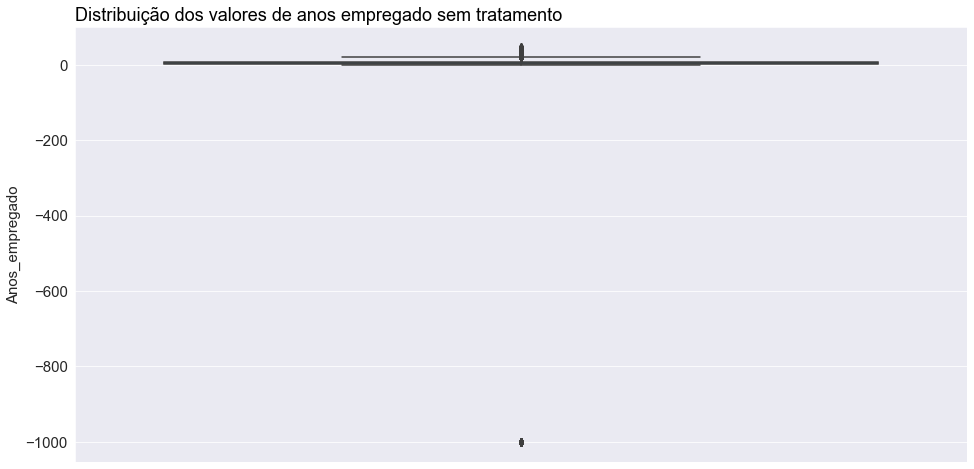

In [20]:
plota(sns.boxplot, dados=df_cadastros_ID_unicos, y='Anos_empregado')
plt.title('Distribuição dos valores de anos empregado sem tratamento', loc = 'left', color = 'black')
plt.show()

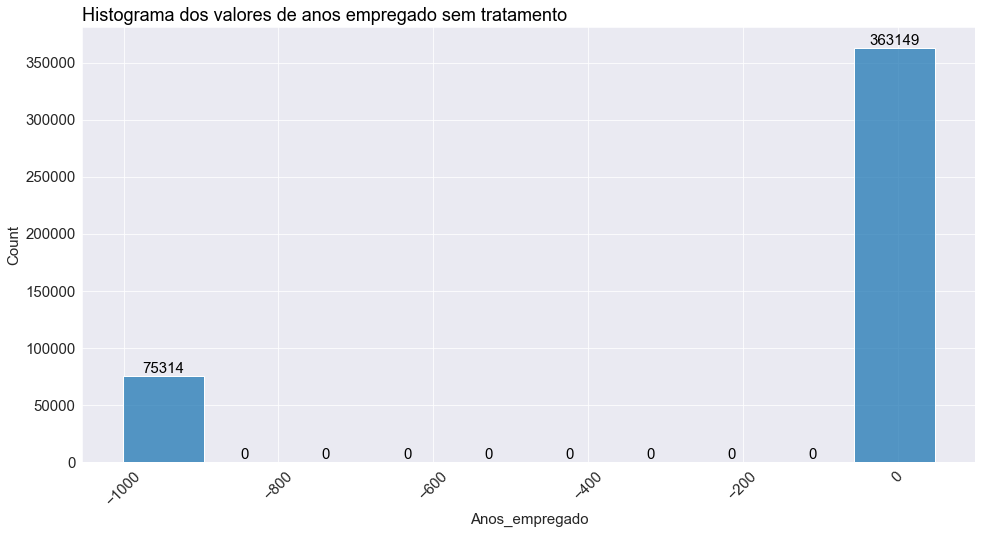

In [21]:
ax = plota(sns.histplot, dados=df_cadastros_ID_unicos, x='Anos_empregado', bins=10)
annot_bar(ax)
plt.title('Histograma dos valores de anos empregado sem tratamento', loc = 'left', color = 'black')
plt.show()

In [22]:
df_cadastros_ID_unicos.query("Anos_empregado <= 0")[['Anos_empregado', 'Categoria_de_renda']].value_counts()

Anos_empregado  Categoria_de_renda 
-1000.7         Pensionista            75314
 0.0            Empregado                 26
                Servidor publico          11
                Associado comercial        7
dtype: int64

In [23]:
df_cadastros_ID_unicos['Anos_empregado'] = df_cadastros_ID_unicos['Anos_empregado'].replace(-1000.7, -1)
df_cadastros_ID_unicos

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
0,5008804,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
1,5008805,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
2,5008806,H,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Seguranca,2.0,3.1
3,5008808,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
4,5008809,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,H,0,1,0,135000.0,Pensionista,Ensino medio,Separado,Casa propria,62.0,1,0,0,0,Outros,1.0,-1.0
438553,6840222,M,0,0,0,103500.0,Empregado,Ensino medio,Solteiro,Casa propria,44.0,1,0,0,0,Construcao Civil,1.0,8.2
438554,6841878,M,0,0,0,54000.0,Associado comercial,Ensino superior,Solteiro,Mora com os pais,22.0,1,1,0,0,Venda,1.0,1.0
438555,6842765,M,0,1,0,72000.0,Pensionista,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Outros,2.0,-1.0


## Desafio 1: Explorar outras maneiras de identificar e de tratar os outliers.

In [24]:
df_cadastros_ID_unicos['Rendimento_Anual'].describe()

count    4.384630e+05
mean     1.875220e+05
std      1.100832e+05
min      2.610000e+04
25%      1.215000e+05
50%      1.611000e+05
75%      2.250000e+05
max      6.750000e+06
Name: Rendimento_Anual, dtype: float64

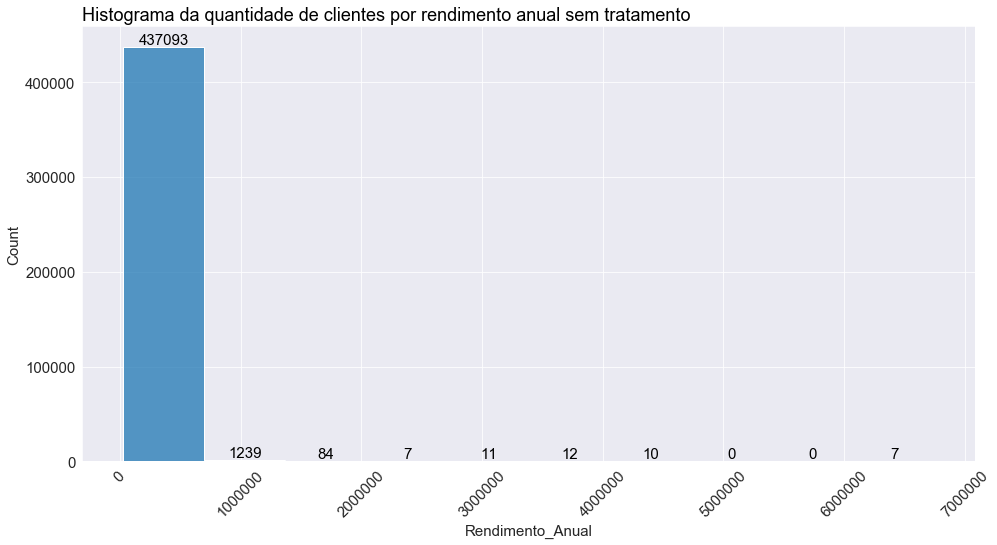

In [25]:
ax = plota(sns.histplot, dados=df_cadastros_ID_unicos, x='Rendimento_Anual', bins=10)
annot_bar(ax)
plt.title('Histograma da quantidade de clientes por rendimento anual sem tratamento', loc = 'left', color = 'black')
plt.show()

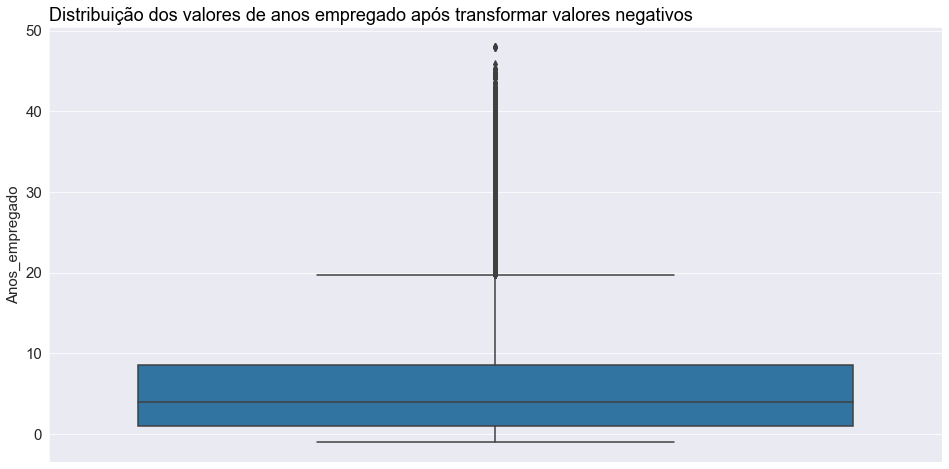

In [26]:
plota(sns.boxplot, dados=df_cadastros_ID_unicos, y='Anos_empregado')
plt.title('Distribuição dos valores de anos empregado após transformar valores negativos', loc = 'left', color = 'black')
plt.show()

## IQR

In [27]:
percentil_25, percentil_75 = np.percentile(df_cadastros_ID_unicos['Rendimento_Anual'], [25,75])
print(percentil_25)
print(percentil_75)

121500.0
225000.0


In [28]:
IQR = percentil_75 - percentil_25
IQR

103500.0

In [29]:
limite_inf = percentil_25 - (1.5 * IQR)
limite_sup = percentil_75 + (1.5 * IQR)
print(limite_inf, ':', limite_sup)

-33750.0 : 380250.0


In [30]:
index_outliers_iqr =  [index for index, valor in df_cadastros_ID_unicos['Rendimento_Anual'].items() if (valor > limite_sup) or (valor < limite_inf)]
len(index_outliers_iqr)

19100

## Z-score

In [31]:
df_z_score_rendimento = df_cadastros_ID_unicos[['Rendimento_Anual']]
df_z_score_rendimento['Z'] = (df_z_score_rendimento['Rendimento_Anual'] - df_z_score_rendimento['Rendimento_Anual'].mean()) / df_z_score_rendimento['Rendimento_Anual'].std(ddof=0)
df_z_score_rendimento

,Rendimento_Anual,Z
0,427500.0,2.179973
1,427500.0,2.179973
2,112500.0,-0.681504
3,270000.0,0.749234
4,270000.0,0.749234
...,...,...
438552,135000.0,-0.477113
438553,103500.0,-0.763260
438554,54000.0,-1.212921
438555,72000.0,-1.049408


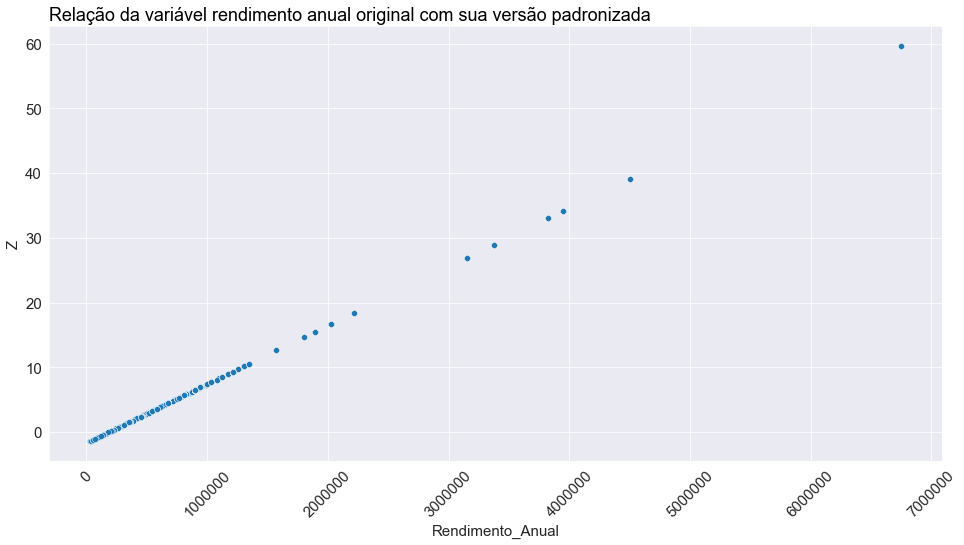

In [32]:
plota(sns.scatterplot, dados=df_z_score_rendimento, x='Rendimento_Anual', y='Z')
plt.title('Relação da variável rendimento anual original com sua versão padronizada', loc = 'left', color = 'black')
plt.show()

In [33]:
index_outliers_z_2=  [index for index, valor in pd.concat([df_cadastros_ID_unicos, df_z_score_rendimento], axis=1)['Z'].items()
                       if abs(valor) > 2]
len(index_outliers_z_2)

12641

In [34]:
index_outliers_z_3 =  [index for index, valor in pd.concat([df_cadastros_ID_unicos, df_z_score_rendimento], axis=1)['Z'].items()
                       if abs(valor) > 3]
len(index_outliers_z_3)

5274

## Análise variáveis quantitativas

In [35]:
df_cadastros_sem_outliers = df_cadastros_ID_unicos.drop(index_outliers_z_2)

In [36]:
df_cadastros_sem_outliers.shape

(425822, 18)

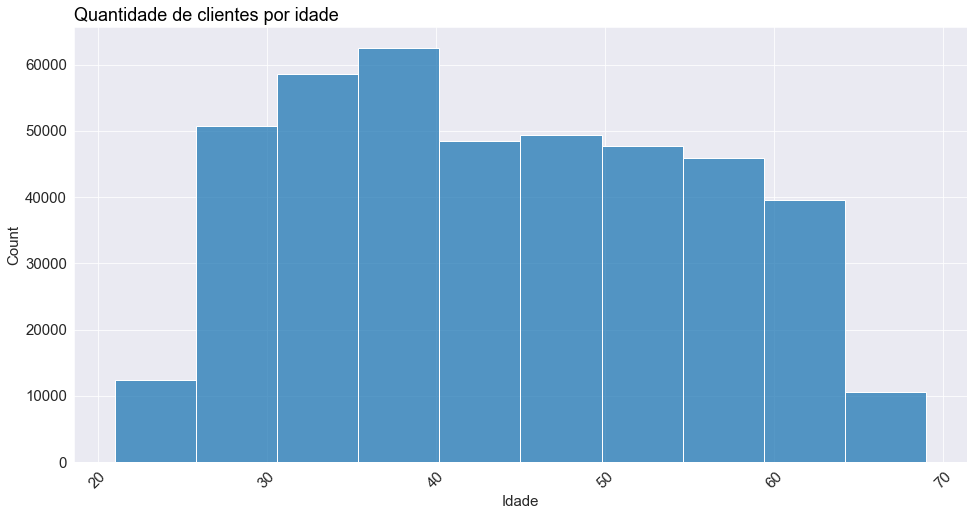

In [37]:
plota(sns.histplot, dados=df_cadastros_sem_outliers, x='Idade', bins=10)
plt.title('Quantidade de clientes por idade ', loc = 'left', color = 'black')
plt.show()

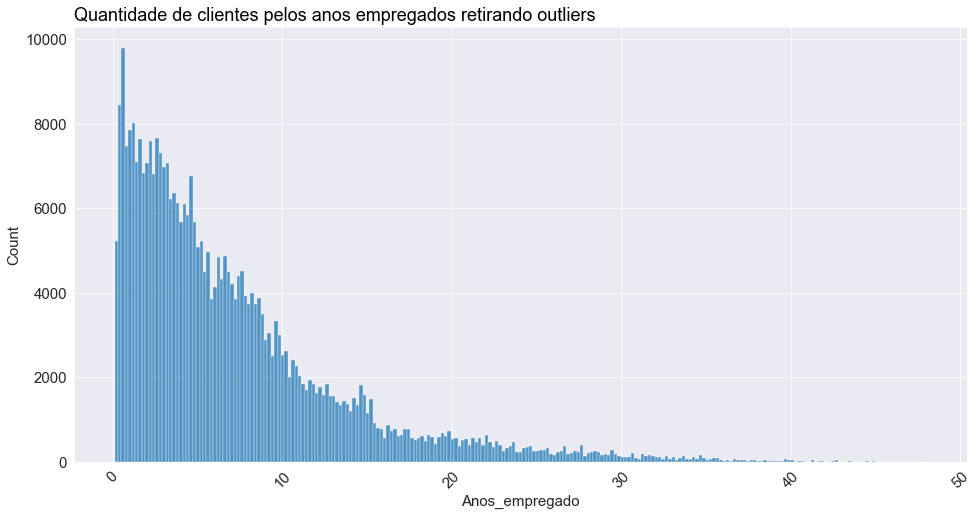

In [38]:
plota(sns.histplot, dados=df_cadastros_sem_outliers.query('Anos_empregado > 0'), x='Anos_empregado')
plt.title('Quantidade de clientes pelos anos empregados retirando outliers', loc = 'left', color = 'black')
plt.show()

## Análise variáveis qualitativas

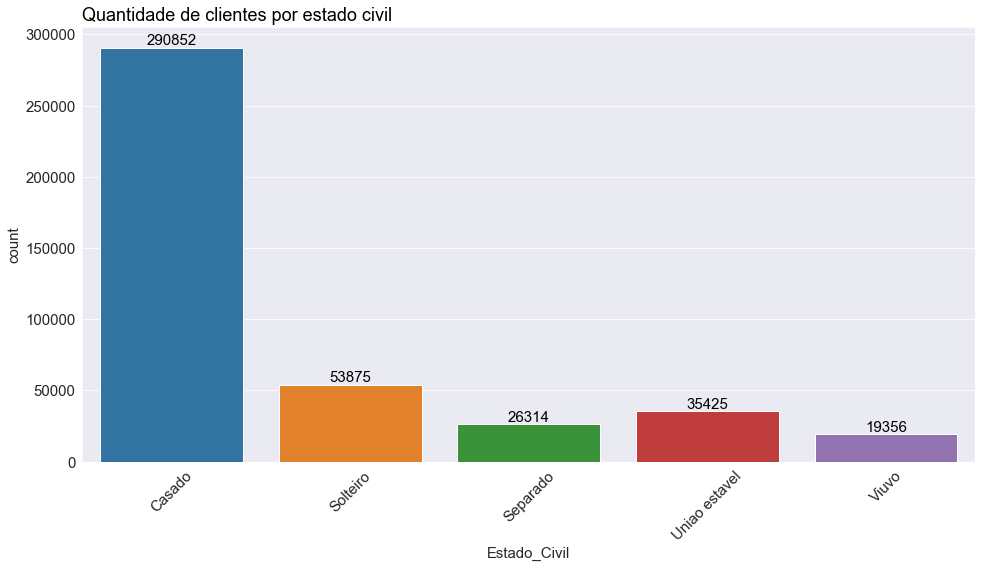

In [39]:
ax = plota(sns.countplot, dados=df_cadastros_sem_outliers, x='Estado_Civil')
annot_bar(ax)
plt.title('Quantidade de clientes por estado civil', loc = 'left', color = 'black')
plt.show()

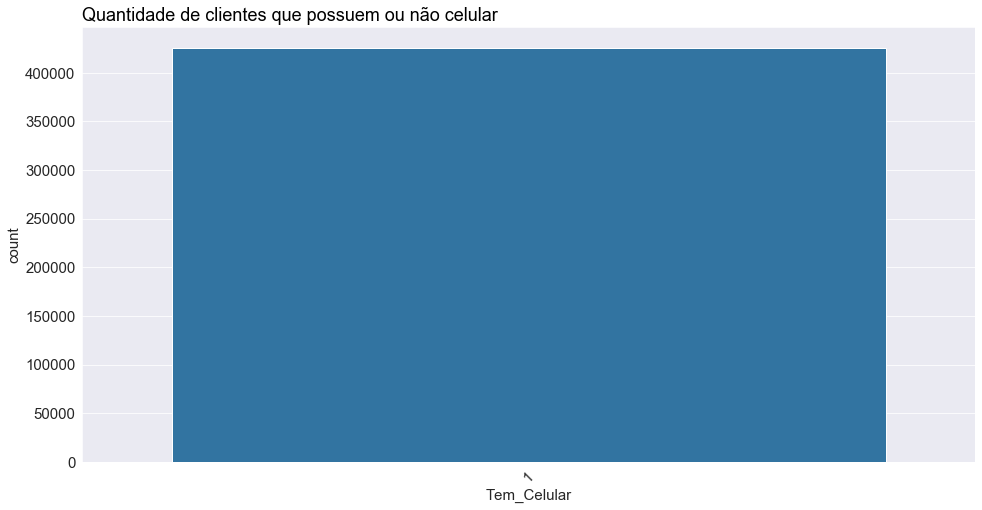

In [40]:
plota(sns.countplot, dados=df_cadastros_sem_outliers, x='Tem_Celular')
plt.title('Quantidade de clientes que possuem ou não celular', loc = 'left', color = 'black')
plt.show()

In [142]:
df_cadastros_trat1 = df_cadastros_sem_outliers.drop(['Tem_Celular', 'Genero'], axis=1)
df_cadastros_trat1.shape

(425822, 16)

## Aula 3

In [42]:
df_aprovados = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/Avaliacao_Credito/main/dados/clientes_aprovados.csv")
df_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias
4,5001712,0,pagamento realizado


In [43]:
Abertura = df_aprovados.groupby(['ID_Cliente']).agg({'Mes_referencia':'min'})['Mes_referencia']
Abertura.name = 'Abertura'
Abertura

ID_Cliente
5001711    -3
5001712   -18
5001713   -21
5001714   -14
5001715   -59
           ..
5150482   -28
5150483   -17
5150484   -12
5150485    -1
5150487   -29
Name: Abertura, Length: 45985, dtype: int64

In [44]:
df_aprovados = df_aprovados.merge(Abertura, on='ID_Cliente')
df_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura
0,5001711,0,nenhum empréstimo,-3
1,5001711,-1,1-29 dias,-3
2,5001711,-2,1-29 dias,-3
3,5001711,-3,1-29 dias,-3
4,5001712,0,pagamento realizado,-18


In [45]:
Final = df_aprovados.groupby(['ID_Cliente']).agg({'Mes_referencia':'max'})['Mes_referencia']
Final.name = 'Final'
Final

ID_Cliente
5001711     0
5001712     0
5001713     0
5001714     0
5001715     0
           ..
5150482   -11
5150483     0
5150484     0
5150485     0
5150487     0
Name: Final, Length: 45985, dtype: int64

In [46]:
df_aprovados = df_aprovados.merge(Final, on='ID_Cliente')
df_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final
0,5001711,0,nenhum empréstimo,-3,0
1,5001711,-1,1-29 dias,-3,0
2,5001711,-2,1-29 dias,-3,0
3,5001711,-3,1-29 dias,-3,0
4,5001712,0,pagamento realizado,-18,0


In [47]:
df_aprovados['Janela'] = df_aprovados['Final'] - df_aprovados['Abertura']
df_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela
0,5001711,0,nenhum empréstimo,-3,0,3
1,5001711,-1,1-29 dias,-3,0,3
2,5001711,-2,1-29 dias,-3,0,3
3,5001711,-3,1-29 dias,-3,0,3
4,5001712,0,pagamento realizado,-18,0,18


In [48]:
dict_faixa_atraso_ind ={'nenhum empréstimo': 0, 'pagamento realizado': 1,
                        '1-29 dias': 2, '30-59 dias': 3, '60-89 dias': 4,
                        '90-119 dias': 5, '120-149 dias': 6, '>150 dias': 7}

In [49]:
df_aprovados['ID_faixa_atraso'] = df_aprovados['Faixa_atraso'].map(dict_faixa_atraso_ind)
df_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,ID_faixa_atraso
0,5001711,0,nenhum empréstimo,-3,0,3,0
1,5001711,-1,1-29 dias,-3,0,3,2
2,5001711,-2,1-29 dias,-3,0,3,2
3,5001711,-3,1-29 dias,-3,0,3,2
4,5001712,0,pagamento realizado,-18,0,18,1


In [50]:
df_aprovados['MOB'] = df_aprovados['Mes_referencia'] - df_aprovados['Abertura']
df_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,ID_faixa_atraso,MOB
0,5001711,0,nenhum empréstimo,-3,0,3,0,3
1,5001711,-1,1-29 dias,-3,0,3,2,2
2,5001711,-2,1-29 dias,-3,0,3,2,1
3,5001711,-3,1-29 dias,-3,0,3,2,0
4,5001712,0,pagamento realizado,-18,0,18,1,18


In [51]:
df_aprovados['Mau'] = df_aprovados.apply(lambda x: 1 if x['ID_faixa_atraso'] > 3 else 0, axis=1)
df_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,ID_faixa_atraso,MOB,Mau
0,5001711,0,nenhum empréstimo,-3,0,3,0,3,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0
2,5001711,-2,1-29 dias,-3,0,3,2,1,0
3,5001711,-3,1-29 dias,-3,0,3,2,0,0
4,5001712,0,pagamento realizado,-18,0,18,1,18,0


In [52]:
df_aprovados_ID = df_aprovados[['ID_Cliente','Abertura', 'Final', 'Janela']].groupby('ID_Cliente').apply(lambda x: x.iloc[0]).reset_index(drop=True)
df_aprovados_ID.head()

,ID_Cliente,Abertura,Final,Janela
0,5001711,-3,0,3
1,5001712,-18,0,18
2,5001713,-21,0,21
3,5001714,-14,0,14
4,5001715,-59,0,59


## Desafio 1: Criar uma tabela com a quantidade de clientes relativa à base por Faixa_atraso.

Calculando primeiro essa tabela considerando as faixas onde pelo menos uma vez o cliente esteve na determinada situação de atraso.

In [53]:
df_aprovados['Faixa_atraso'].value_counts()

pagamento realizado    442031
1-29 dias              383120
nenhum empréstimo      209230
30-59 dias              11090
>150 dias                1693
60-89 dias                868
90-119 dias               320
120-149 dias              223
Name: Faixa_atraso, dtype: int64

In [94]:
tabela_faixa_atraso = df_aprovados.groupby(['Faixa_atraso', 'ID_faixa_atraso']).apply(lambda X: len(X['ID_Cliente'].unique())).reset_indexdex(name='Qnt_Clientes')
tabela_faixa_atraso = tabela_faixa_atraso.sort_values('ID_faixa_atraso')
tabela_faixa_atraso

,Faixa_atraso,ID_faixa_atraso,Qnt_Clientes
6,nenhum empréstimo,0,25005
7,pagamento realizado,1,22707
0,1-29 dias,2,39980
2,30-59 dias,3,5201
3,60-89 dias,4,597
4,90-119 dias,5,268
1,120-149 dias,6,190
5,>150 dias,7,195


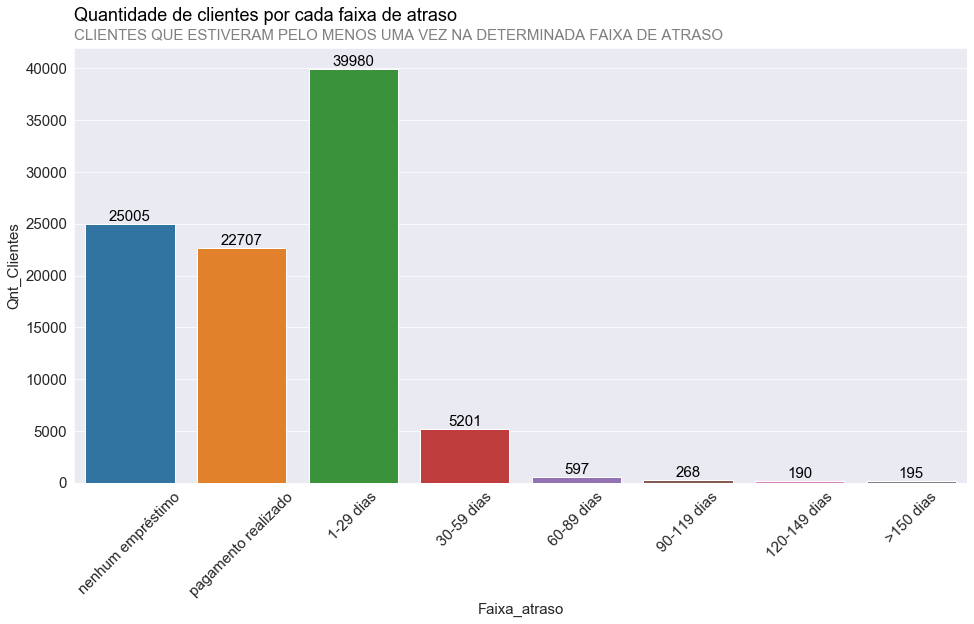

In [55]:
ax = plota(sns.barplot, tabela_faixa_atraso, x = 'Faixa_atraso', y='Qnt_Clientes')
annot_bar(ax)
plt.title('Quantidade de clientes por cada faixa de atraso\n', loc = 'left', color = 'black')
plt.text(0,1.02, 'CLIENTES QUE ESTIVERAM PELO MENOS UMA VEZ NA DETERMINADA FAIXA DE ATRASO', color='gray', transform=ax.transAxes, fontsize=15)
plt.show()

Pelo gráfico percebemos que muitos clientes pagaram em dia pelo menos um mês, mas a maior parte ainda atrasou de 1 a 29 dias, além disso temos uma quantidade considerável registros de clientes que não realizaram nenhum empréstimo pelo menos em algum mês, e menos clientes que atrasaram mais de 29 dias pelo menos uma vez.

Agora calulando a tabela pelo atraso máximo de cada cliente.

In [56]:
df_atraso_max_cliente_ID = df_aprovados.groupby(['ID_Cliente'])['ID_faixa_atraso'].max().reset_index(name = 'Atraso_max')
df_atraso_max_cliente_ID.head()

,ID_Cliente,Atraso_max
0,5001711,2
1,5001712,2
2,5001713,0
3,5001714,0
4,5001715,0


In [57]:
dict_faixa_atraso_ind_reverso = {v: k for k, v in dict_faixa_atraso_ind.items()}

tabela_clientes_atraso_max = df_atraso_max_cliente_ID.groupby('Atraso_max').size().reset_index(name = 'Qnt_Clientes').sort_values('Atraso_max')
tabela_clientes_atraso_max['Atraso_max'] = tabela_clientes_atraso_max['Atraso_max'].map(dict_faixa_atraso_ind_reverso)
tabela_clientes_atraso_max

,Atraso_max,Qnt_Clientes
0,nenhum empréstimo,4536
1,pagamento realizado,1417
2,1-29 dias,34682
3,30-59 dias,4683
4,60-89 dias,336
5,90-119 dias,88
6,120-149 dias,48
7,>150 dias,195


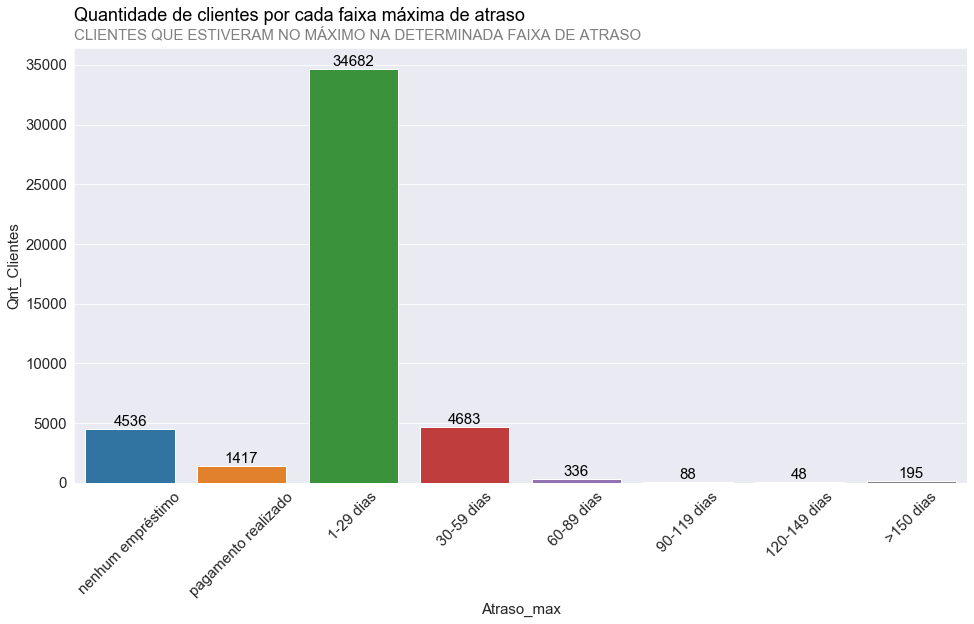

In [58]:
ax = plota(sns.barplot, tabela_clientes_atraso_max, x = 'Atraso_max', y='Qnt_Clientes')
annot_bar(ax)
plt.title('Quantidade de clientes por cada faixa máxima de atraso\n', loc = 'left', color = 'black')
plt.text(0,1.02, 'CLIENTES QUE ESTIVERAM NO MÁXIMO NA DETERMINADA FAIXA DE ATRASO', color='gray', transform=ax.transAxes, fontsize=15)
plt.show()

Agora fica claro que bem menos clientes realizaram o pagamento em dia em todos os meses, a maioria atrasou pelo menos uma vez de 1 a 29 dias, no entanto atrasos maiores ainda são menos comuns.

In [59]:
df_denominador = df_aprovados_ID.groupby('Abertura').size().reset_index()
df_denominador.columns = ['Abertura','Qtd_Clientes']
df_denominador.head()

,Abertura,Qtd_Clientes
0,-60,415
1,-59,406
2,-58,440
3,-57,400
4,-56,470


In [60]:
df_vintage = df_aprovados.groupby(['Abertura','MOB']).size().reset_index()
df_vintage.columns = ['Abertura','MOB','Qtd_Clientes']
df_vintage.head()

,Abertura,MOB,Qtd_Clientes
0,-60,0,415
1,-60,1,414
2,-60,2,410
3,-60,3,408
4,-60,4,403


In [61]:
df_vintage = pd.merge(df_vintage[['Abertura','MOB']], df_denominador, on = ['Abertura'], how = 'left')
df_vintage.head()

,Abertura,MOB,Qtd_Clientes
0,-60,0,415
1,-60,1,415
2,-60,2,415
3,-60,3,415
4,-60,4,415


In [62]:
df_vintage['Qtd_Mau'] = np.nan

for j in range(-60,1):
    ls = []
    for i in range(0,61):
        due = list(df_aprovados.query('Mau == 1 and MOB == @i and Abertura == @j')['ID_Cliente'])
        ls.extend(due)
        df_vintage.loc[(df_vintage['MOB'] == i) & (df_vintage['Abertura'] == j), 'Qtd_Mau'] = len(set(ls))
        
df_vintage['Taxa_de_Mau']  = df_vintage['Qtd_Mau'] / df_vintage['Qtd_Clientes']
df_vintage

,Abertura,MOB,Qtd_Clientes,Qtd_Mau,Taxa_de_Mau
0,-60,0,415,0.0,0.000000
1,-60,1,415,0.0,0.000000
2,-60,2,415,0.0,0.000000
3,-60,3,415,0.0,0.000000
4,-60,4,415,0.0,0.000000
...,...,...,...,...,...
1886,-2,1,771,0.0,0.000000
1887,-2,2,771,1.0,0.001297
1888,-1,0,686,0.0,0.000000
1889,-1,1,686,0.0,0.000000


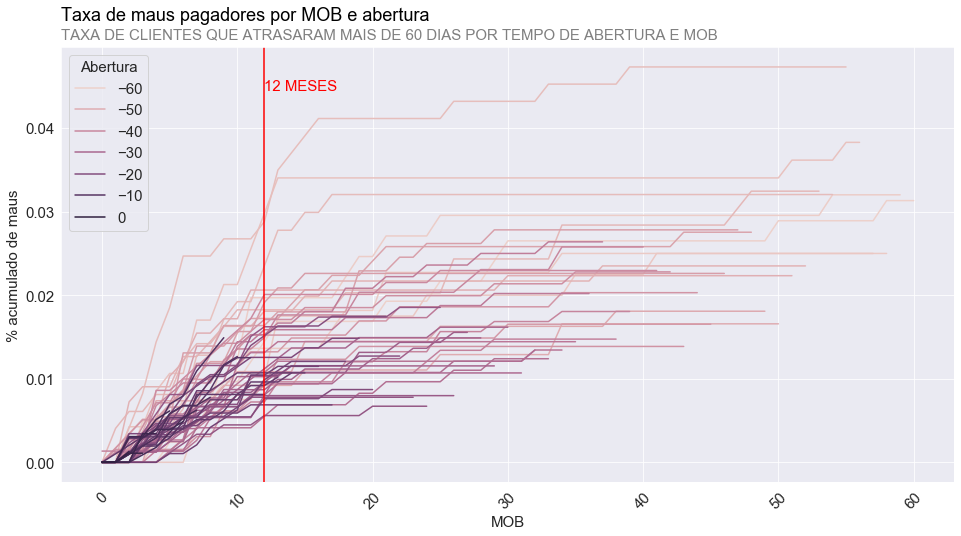

In [63]:
ax = plota(sns.lineplot, df_vintage, x='MOB', y = 'Taxa_de_Mau', hue = 'Abertura')
ax.axvline(x = 12, color='red')
ax.text(12, 0.9, '12 MESES', color='red', transform = transforms.blended_transform_factory(ax.transData, ax.transAxes))
plt.title('Taxa de maus pagadores por MOB e abertura\n', loc = 'left', color = 'black')
plt.text(0,1.02, 'TAXA DE CLIENTES QUE ATRASARAM MAIS DE 60 DIAS POR TEMPO DE ABERTURA E MOB', color='gray', transform=ax.transAxes, fontsize=15)
plt.ylabel('% acumulado de maus')
plt.show()

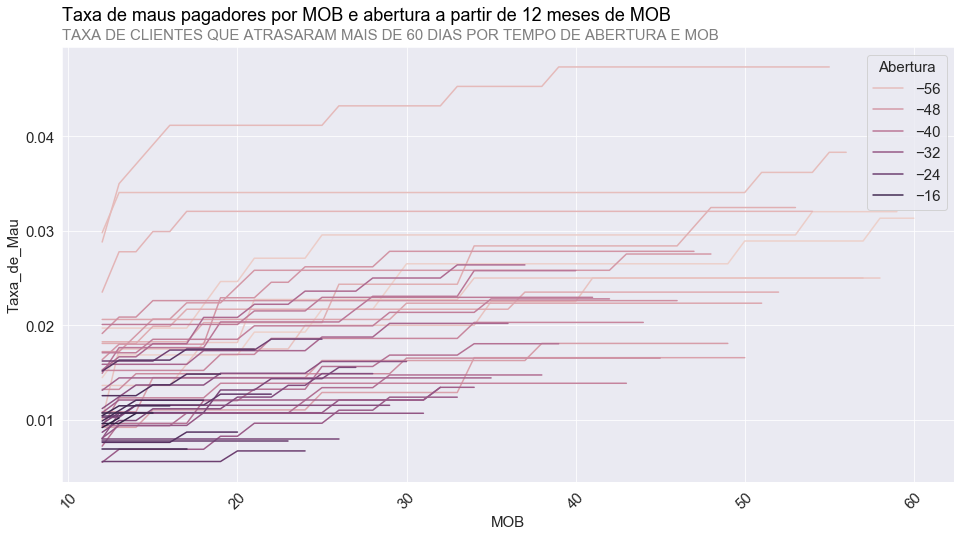

In [64]:
ax = plota(sns.lineplot, df_vintage[df_vintage['MOB'] >= 12], x='MOB', y = 'Taxa_de_Mau', hue = 'Abertura')
plt.title('Taxa de maus pagadores por MOB e abertura a partir de 12 meses de MOB\n', loc = 'left', color = 'black')
plt.text(0,1.02, 'TAXA DE CLIENTES QUE ATRASARAM MAIS DE 60 DIAS POR TEMPO DE ABERTURA E MOB', color='gray', transform=ax.transAxes, fontsize=15)
plt.show()

In [68]:
df_aprovados_ID.head()

,ID_Cliente,Abertura,Final,Janela
0,5001711,-3,0,3
1,5001712,-18,0,18
2,5001713,-21,0,21
3,5001714,-14,0,14
4,5001715,-59,0,59


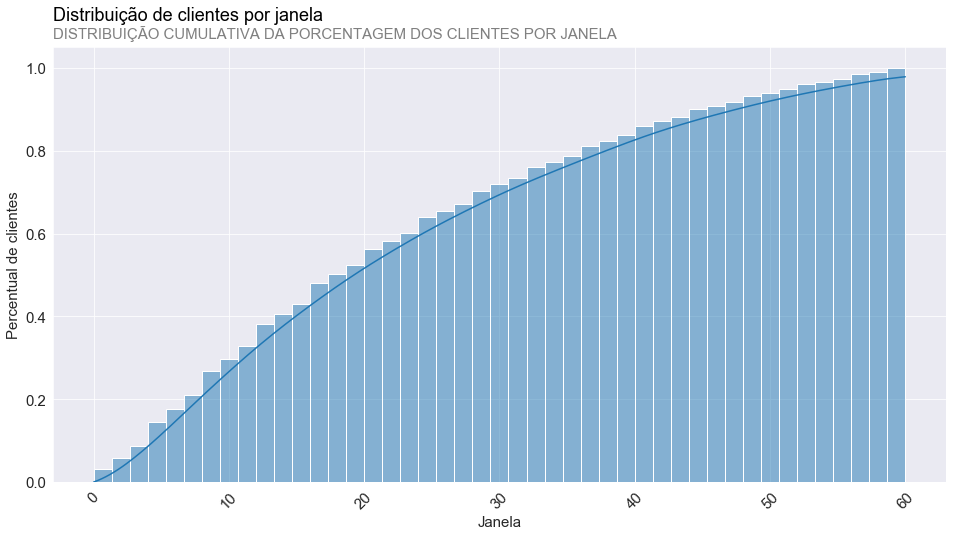

In [70]:
ax = plota(sns.histplot, df_aprovados_ID, x='Janela', cumulative=True, stat='density', kde=True)
plt.title('Distribuição de clientes por janela\n', loc = 'left', color = 'black')
plt.text(0,1.02, 'DISTRIBUIÇÃO CUMULATIVA DA PORCENTAGEM DOS CLIENTES POR JANELA', color='gray', transform=ax.transAxes, fontsize=15)
plt.xlabel('Janela')
plt.ylabel('Percentual de clientes')
plt.show()

In [84]:
dict_intervalo_atraso = {'maior_30_dias': 3, 'maior_60_dias': 4, 'maior_90_dias': 5,
                        'maior_120_dias': 6, 'maior_150_dias': 7}

In [85]:
for chave, valor in dict_intervalo_atraso.items():
    df_aprovados[f'Mau_{chave}'] = df_aprovados.apply(lambda x: 1 if x['ID_faixa_atraso'] >= valor else 0, axis=1)
df_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,ID_faixa_atraso,MOB,Mau,Mau_nenhum empréstimo,...,Mau_30-59 dias,Mau_60-89 dias,Mau_90-119 dias,Mau_120-149 dias,Mau_>150 dias,Mau_maior_30_dias,Mau_maior_60_dias,Mau_maior_90_dias,Mau_maior_120_dias,Mau_maior_150_dias
0,5001711,0,nenhum empréstimo,-3,0,3,0,3,0,1,...,0,0,0,0,0,0,0,0,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0,1,...,0,0,0,0,0,0,0,0,0,0
2,5001711,-2,1-29 dias,-3,0,3,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,5001711,-3,1-29 dias,-3,0,3,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5001712,0,pagamento realizado,-18,0,18,1,18,0,1,...,0,0,0,0,0,0,0,0,0,0


In [98]:
df_taxa_mau.index.name = 

RangeIndex(start=0, stop=61, step=1)

In [99]:
dict_taxa_mau = {}
id_sum = len(set(df_aprovados['ID_Cliente']))

for chave in dict_intervalo_atraso.keys():
    df_min_mau = df_aprovados.query(f'Mau_{chave} == 1').groupby('ID_Cliente')['MOB'].min().reset_index()
    df_mob_taxa_mau = pd.DataFrame({'MOB':range(0,61), 'Taxa_Mau': np.nan})
    lst = []
    for i in range(0,61):
        due = df_min_mau.query('MOB == @i')['ID_Cliente'].to_list()
        lst.extend(due) #cumsum
        df_mob_taxa_mau.loc[df_mob_taxa_mau['MOB'] == i, 'Taxa_Mau'] = len(set(lst)) / id_sum
    dict_taxa_mau[chave] = df_mob_taxa_mau['Taxa_Mau']
     
df_taxa_mau = pd.DataFrame(dict_taxa_mau)
df_taxa_mau.index.name = 'MOB'
df_taxa_mau = df_taxa_mau.reset_index()
df_taxa_mau.head()

,MOB,maior_30_dias,maior_60_dias,maior_90_dias,maior_120_dias,maior_150_dias
0,0,0.000304,0.000022,0.000022,0.000022,0.000022
1,1,0.011612,0.000174,0.000087,0.000087,0.000087
2,2,0.025878,0.001153,0.000196,0.000174,0.000174
3,3,0.036860,0.002240,0.000696,0.000304,0.000304
4,4,0.047385,0.003392,0.001044,0.000696,0.000348


In [102]:
df_taxa_mau_melt = pd.melt(df_taxa_mau, id_vars='MOB', var_name = 'Tempo_min_mau', value_name = 'taxa_mau')
df_taxa_mau_melt

,MOB,Tempo_min_mau,taxa_mau
0,0,maior_30_dias,0.000304
1,1,maior_30_dias,0.011612
2,2,maior_30_dias,0.025878
3,3,maior_30_dias,0.036860
4,4,maior_30_dias,0.047385
...,...,...,...
300,56,maior_150_dias,0.004219
301,57,maior_150_dias,0.004219
302,58,maior_150_dias,0.004241
303,59,maior_150_dias,0.004241


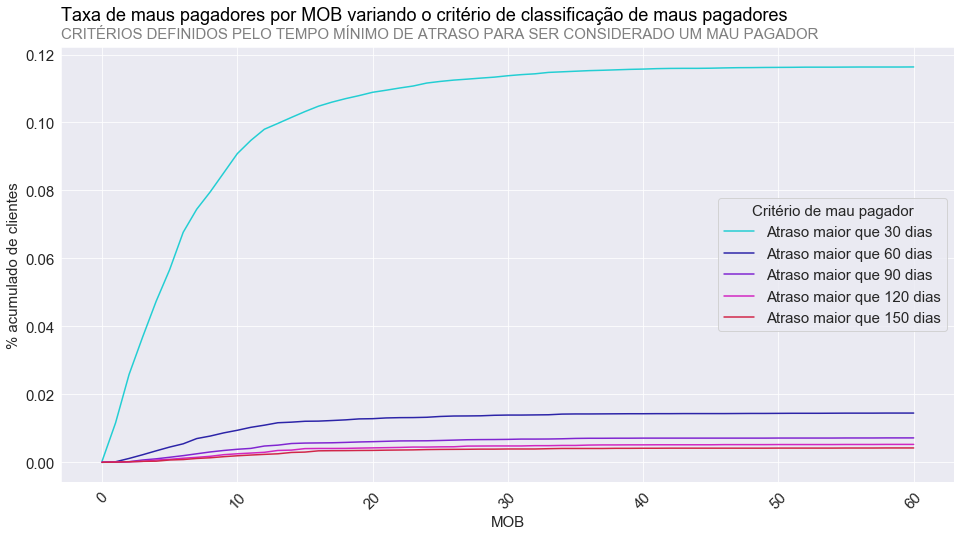

In [131]:
ax = plota(sns.lineplot, df_taxa_mau_melt, x='MOB', y='taxa_mau', hue = 'Tempo_min_mau', 
           palette = ['#23CED3', '#2C24A8', '#8026D1', '#D126C1', '#D12648'])
plt.title('Taxa de maus pagadores por MOB variando o critério de classificação de maus pagadores\n', loc = 'left', color = 'black')
plt.text(0, 1.02,'CRITÉRIOS DEFINIDOS PELO TEMPO MÍNIMO DE ATRASO PARA SER CONSIDERADO UM MAU PAGADOR', color='gray', transform=ax.transAxes, fontsize=15)
plt.xlabel('MOB')
plt.ylabel('% acumulado de clientes')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels=['Atraso maior que 30 dias', 'Atraso maior que 60 dias', 'Atraso maior que 90 dias', 'Atraso maior que 120 dias', 'Atraso maior que 150 dias'],
           title = 'Critério de mau pagador')
plt.show()

In [121]:
len(df_aprovados.query('Janela >= 12').groupby('ID_Cliente').count().index)

30918

In [134]:
df_aprovados_trat1 = df_aprovados.query('Janela >= 12').copy()
df_aprovados_trat1.shape

(943061, 22)

In [135]:
def verifica(registros):
    lista_status = registros['Faixa_atraso'].to_list()
    if '60-89 dias' in lista_status or '90-119 dias' in lista_status or '120-149 dias' in lista_status or '>150 dias' in lista_status:
        return 1
    else:
        return 0 

In [136]:
df_registros_creditos_id = pd.DataFrame(df_aprovados_trat1.groupby('ID_Cliente').apply(verifica)).reset_index()
df_registros_creditos_id.columns = ['ID_Cliente', 'Mau']
df_registros_creditos_id.head()

,ID_Cliente,Mau
0,5001712,0
1,5001713,0
2,5001714,0
3,5001715,0
4,5001717,0


In [139]:
df_registros_creditos_id.shape

(30918, 2)

In [143]:
df_cadastros_trat1.shape

(425822, 16)

In [144]:
df_registro_clientes_targets = df_cadastros_trat1.merge(df_registros_creditos_id, on='ID_Cliente')
df_registro_clientes_targets.head()

,ID_Cliente,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado,Mau
0,5008806,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,0,0,0,Seguranca,2.0,3.1,0
1,5008810,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,0,1,1,Venda,1.0,8.4,0
2,5008811,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,0,1,1,Venda,1.0,8.4,0
3,5008812,0,1,0,283500.0,Pensionista,Ensino superior,Separado,Casa propria,62.0,0,0,0,Outros,1.0,-1.0,0
4,5008813,0,1,0,283500.0,Pensionista,Ensino superior,Separado,Casa propria,62.0,0,0,0,Outros,1.0,-1.0,0


In [145]:
df_registro_clientes_targets['Mau'].value_counts(normalize=True)*100

0    97.726673
1     2.273327
Name: Mau, dtype: float64

In [146]:
df_registro_clientes_targets.shape

(22742, 17)

## Desafio 2: Conhecer técnicas para resolver target.

Como foi possível perceber possuímos um problema muito grande no dataset final depois de definir os maus pagadores, que é um desbalanceamento das classes na variável a ser prevista, ou seja, temos muito mas exemplos de pessoas que não foram classificadas como mau pagadoras através da análise vintage do que pessoas que foram consideradas maus pagadores.

Para resolver esse problema acredito que a melhor solução seria tentar buscar mais dados e exemplos de pessoas consideradas maus pagadoras, porém no nosso contexto isso não é viável por não termos acesso ao banco de dados. Além disso, uma das estratégias que pode nos ajudar é relizar uma reamostragem como oversampling ou undersampling, essas técnicas consistem em balancear as classes realizando sorteios aletórios para gerar mais dados da classe minoritária(oversampling) ou retirar dados da classe majoritária(undersampling). 

Porém mesmo com essas técnicas precisamos ter atenção e cuidado, principalmente por termos esse desbalanceamento muito grande de 97.72% contra 2.27%. Portanto ao sortear dados gerando novas amostras da classe minoritária pode gerar algum overfitting por precisar repetir muitos dados até chegar em um equilíbrio das classes. E ao retirar dados da classe majoritária pode ser significar a perda de dados importantes que seriam utilizados pelo modelo.

Referência : [8 Tactics to Combat Imbalanced Classes in Your Machine Learning Dataset](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/)